# ⚡ Electromagnetism Problem 1: Simulating the Effects of the Lorentz Force

<div style="background-color: #f0f8ff; padding: 15px; border-radius: 10px;">
<h2 style="color: #2E86C1; text-align: center;">🌐 Exploring Charged Particle Motion in Electric and Magnetic Fields</h2>
</div>

---

## 🎯 Motivation

The Lorentz force, given by $F = q(E + v \times B)$, governs the motion of charged particles in electric ($E$) and magnetic ($B$) fields. It plays a critical role in fields like plasma physics, particle accelerators, and astrophysics. By simulating the motion of a charged particle, we can visualize complex trajectories and understand practical applications such as cyclotrons, mass spectrometers, and magnetic confinement in fusion devices.

---

## 📜 Task Breakdown

1. **Exploration of Applications**:
   - Identify systems where the Lorentz force is key (e.g., particle accelerators, mass spectrometers, plasma confinement).
   - Discuss the roles of electric ($E$) and magnetic ($B$) fields in controlling particle motion.
2. **Simulating Particle Motion**:
   - Simulate the trajectory of a charged particle under:
     - A uniform magnetic field.
     - Combined uniform electric and magnetic fields.
     - Crossed electric and magnetic fields.
   - Capture circular, helical, or drift motion based on initial conditions.
3. **Parameter Exploration**:
   - Vary field strengths ($E$, $B$), initial velocity ($v$), and particle properties ($q$, $m$).
   - Analyze their effects on the trajectory.
4. **Visualization**:
   - Create 2D and 3D plots of the particle’s path for different scenarios.
   - Highlight phenomena like the Larmor radius and drift velocity.

---

## 🌟 Exploration of Applications

### Systems Involving the Lorentz Force
- **Particle Accelerators (e.g., Cyclotrons)**: The magnetic field causes charged particles to move in circular paths, while electric fields accelerate them. The Lorentz force ensures particles gain energy with each cycle.
- **Mass Spectrometers**: The Lorentz force separates ions by mass-to-charge ratio, as particles follow curved paths in a magnetic field.
- **Plasma Confinement (e.g., Tokamaks)**: Magnetic fields confine charged particles in helical paths to sustain high-temperature plasmas for fusion.
- **Astrophysics**: The Lorentz force governs the motion of charged particles in cosmic magnetic fields, such as in the aurora or solar wind interactions.

### Roles of Electric and Magnetic Fields
- **Electric Field ($E$)**: Exerts a force $F_E = qE$, accelerating the particle in the direction of the field (for positive $q$).
- **Magnetic Field ($B$)**: Exerts a force $F_B = q(v \times B)$, perpendicular to both the velocity and the field, causing circular or helical motion.
- **Combined Fields**: In crossed fields ($E \perp B$), particles exhibit drift motion, such as the $E \times B$ drift, which is crucial in plasma physics.

---

## 🧮 Simulating Particle Motion

### Lorentz Force Equation
The Lorentz force on a charged particle is:

$$
F = q(E + v \times B)
$$

Using Newton’s Second Law ($F = m a$), the acceleration is:

$$
a = \frac{dv}{dt} = \frac{q}{m} (E + v \times B)
$$

We also have:

$$
\frac{dr}{dt} = v
$$

### Numerical Integration
We use the **Runge-Kutta 4th Order (RK4)** method  to solve these differential equations numerically, ensuring accurate trajectories.

### Scenarios to Simulate
1. **Uniform Magnetic Field**: $B$ along the z-axis, $E = 0$. Expect circular or helical motion.
2. **Combined Electric and Magnetic Fields**: $B$ along z, $E$ along x. Expect helical motion with acceleration.
3. **Crossed Fields**: $E$ along x, $B$ along z. Expect $E \times B$ drift motion.

---

## 💻 Computational Simulation: Visualizing Particle Trajectories

We’ll simulate the particle’s motion for the three scenarios, visualize the trajectories in 2D and 3D, and explore parameter variations.

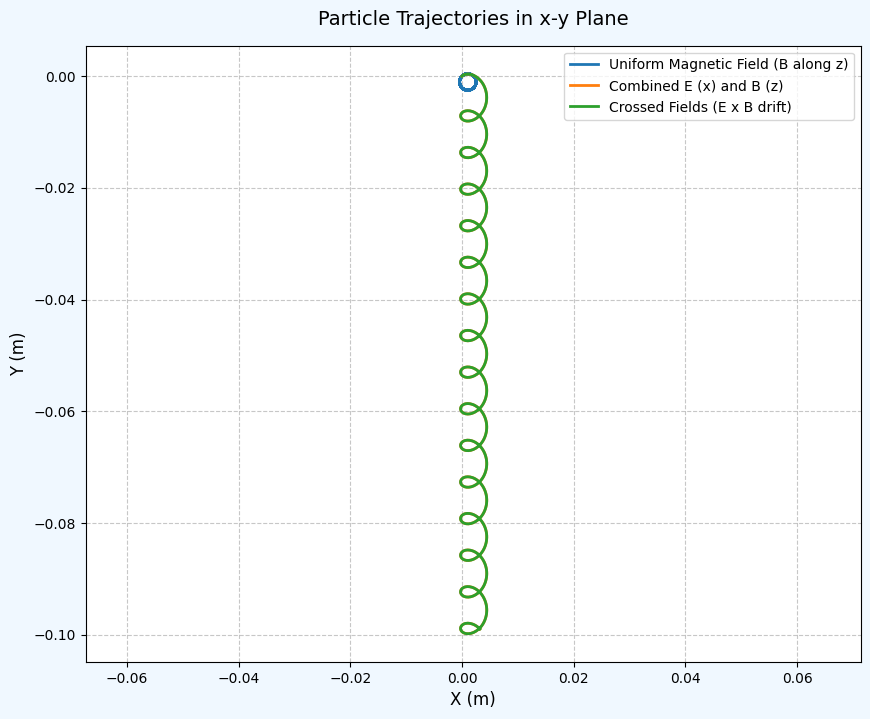

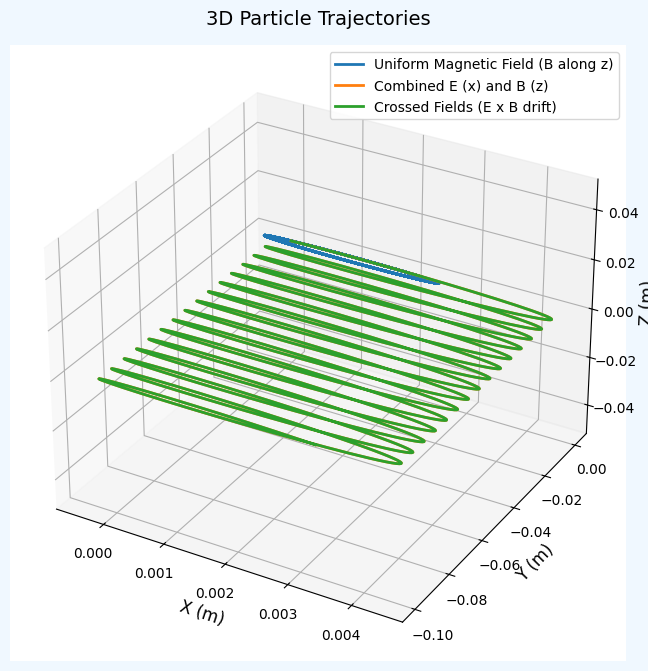

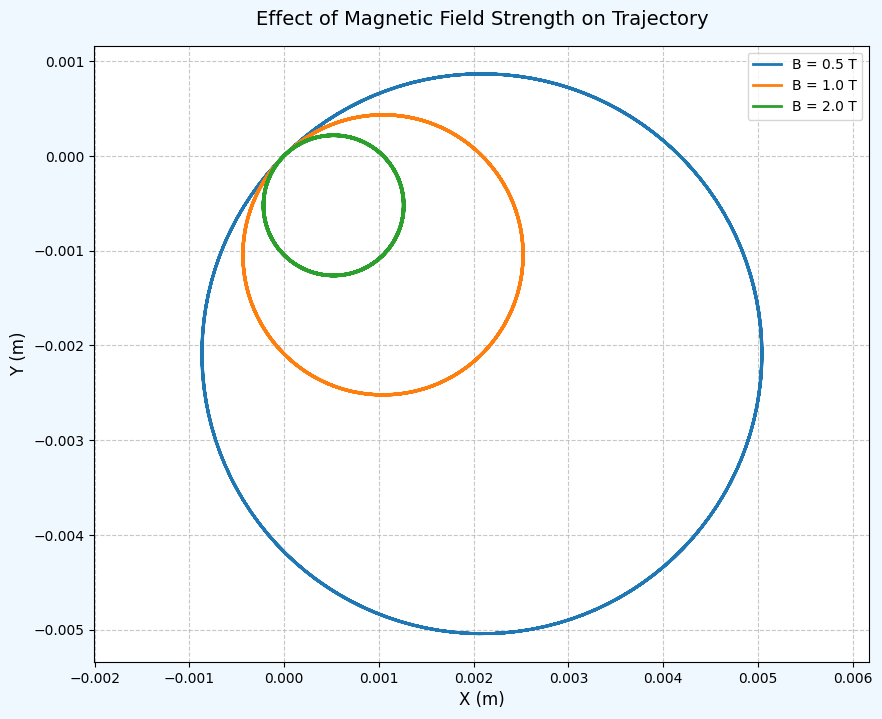

In [ ]:
# Cell 1: Dependency Check
try:
    import numpy
    import matplotlib
    import scipy
    from IPython.display import display, HTML
    display(HTML("<h3 style='color: #2ECC71;'>✅ All Required Libraries Installed</h3>"))
except ImportError as e:
    display(HTML("<h3 style='color: #FF5733;'>❌ Missing Library: " + str(e) + "</h3>"))
    display(HTML("<p>Please install the missing library using: <code>pip install " + str(e).split("'")[1] + "</code></p>"))

# Cell 2: Setup with Style
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, HTML

display(HTML("<h2 style='color: #FF5733; text-align: center;'>✨ Libraries Initialized for Lorentz Force Simulation ✨</h2>"))

# Cell 3: Define Lorentz Force and Equations of Motion
# Particle properties
q = 1.6e-19  # Charge (Coulombs, e.g., proton)
m = 1.67e-27  # Mass (kg, e.g., proton)

# Equations of motion
def lorentz_equation(t, state, q, m, E, B):
    r = state[:3]  # Position (x, y, z)
    v = state[3:]  # Velocity (vx, vy, vz)
    # Lorentz force acceleration: a = (q/m)(E + v x B)
    v_cross_B = np.cross(v, B)
    a = (q / m) * (E + v_cross_B)
    return np.concatenate([v, a])

# Cell 4: Simulate Trajectories for Different Scenarios
# Simulation parameters
t_span = (0, 1e-6)  # Time span (seconds)
t_eval = np.linspace(0, 1e-6, 1000)  # Time points for evaluation

# Initial conditions
r0 = np.array([0.0, 0.0, 0.0])  # Start at origin
v0 = np.array([1e5, 1e5, 0.0])  # Initial velocity (m/s)

# Scenarios
scenarios = {
    'Uniform B': {
        'E': np.array([0.0, 0.0, 0.0]),  # No electric field
        'B': np.array([0.0, 0.0, 1.0]),  # B along z-axis (Tesla)
        'label': 'Uniform Magnetic Field (B along z)'
    },
    'Combined E and B': {
        'E': np.array([1e5, 0.0, 0.0]),  # E along x-axis (V/m)
        'B': np.array([0.0, 0.0, 1.0]),  # B along z-axis
        'label': 'Combined E (x) and B (z)'
    },
    'Crossed Fields': {
        'E': np.array([1e5, 0.0, 0.0]),  # E along x-axis
        'B': np.array([0.0, 0.0, 1.0]),  # B along z-axis
        'label': 'Crossed Fields (E x B drift)'
    }
}

# Simulate trajectories
trajectories = {}
for scenario, params in scenarios.items():
    state0 = np.concatenate([r0, v0])
    sol = solve_ivp(lorentz_equation, t_span, state0, args=(q, m, params['E'], params['B']), 
                    t_eval=t_eval, method='RK45')
    trajectories[scenario] = {
        't': sol.t,
        'r': sol.y[:3].T,  # Position (x, y, z)
        'v': sol.y[3:].T   # Velocity (vx, vy, vz)
    }

# Cell 5: Plot Trajectories in 2D (x-y plane)
plt.figure(figsize=(10, 8), facecolor='#f0f8ff')
for scenario, data in trajectories.items():
    params = scenarios[scenario]
    plt.plot(data['r'][:, 0], data['r'][:, 1], label=params['label'], linewidth=2)

plt.xlabel('X (m)', fontsize=12)
plt.ylabel('Y (m)', fontsize=12)
plt.title('Particle Trajectories in x-y Plane', fontsize=14, pad=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.axis('equal')
plt.savefig('trajectories_2d.png')
plt.show()

# Cell 6: Plot Trajectories in 3D
fig = plt.figure(figsize=(10, 8), facecolor='#f0f8ff')
ax = fig.add_subplot(111, projection='3d')
for scenario, data in trajectories.items():
    params = scenarios[scenario]
    ax.plot(data['r'][:, 0], data['r'][:, 1], data['r'][:, 2], label=params['label'], linewidth=2)

ax.set_xlabel('X (m)', fontsize=12)
ax.set_ylabel('Y (m)', fontsize=12)
ax.set_zlabel('Z (m)', fontsize=12)
ax.set_title('3D Particle Trajectories', fontsize=14, pad=15)
ax.grid(True)
ax.legend()
plt.savefig('trajectories_3d.png')
plt.show()

# Cell 7: Parameter Exploration - Vary Magnetic Field Strength
B_values = [0.5, 1.0, 2.0]  # Different B-field strengths (Tesla)
plt.figure(figsize=(10, 8), facecolor='#f0f8ff')
for Bz in B_values:
    B = np.array([0.0, 0.0, Bz])
    E = np.array([0.0, 0.0, 0.0])
    state0 = np.concatenate([r0, v0])
    sol = solve_ivp(lorentz_equation, t_span, state0, args=(q, m, E, B), t_eval=t_eval, method='RK45')
    r = sol.y[:3].T
    plt.plot(r[:, 0], r[:, 1], label=f'B = {Bz} T', linewidth=2)

plt.xlabel('X (m)', fontsize=12)
plt.ylabel('Y (m)', fontsize=12)
plt.title('Effect of Magnetic Field Strength on Trajectory', fontsize=14, pad=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.axis('equal')
plt.savefig('b_field_variation.png')
plt.show()

# Cell 8: Calculate Larmor Radius and Drift Velocity (Fixed)
display(HTML("<h2 style='color: #2ECC71;'>🔍 Physical Phenomena</h2>"))

# Larmor radius for Uniform B scenario
scenario = 'Uniform B'
data = trajectories[scenario]
v_perp = np.linalg.norm(data['v'][:, :2], axis=1)  # Perpendicular velocity (in x-y plane)
B = scenarios[scenario]['B']
B_mag = np.linalg.norm(B)
larmor_radius = (m * v_perp[0]) / (q * B_mag)  # Scalar value, no indexing needed
display(HTML(f"<p><b>Larmor Radius (Uniform B)</b>: {larmor_radius:.2e} m</p>"))

# Drift velocity for Crossed Fields scenario
scenario = 'Crossed Fields'
E = scenarios[scenario]['E']
B = scenarios[scenario]['B']
E_mag = np.linalg.norm(E)
B_mag = np.linalg.norm(B)
drift_velocity = E_mag / B_mag  # E x B drift speed
display(HTML(f"<p><b>E x B Drift Velocity (Crossed Fields)</b>: {drift_velocity:.2e} m/s</p>"))

# Cell 9: Discussion and Suggestions
display(HTML("<h2 style='color: #3498DB;'>📝 Discussion and Practical Applications</h2>"))
display(HTML("<p><b>Uniform Magnetic Field</b>: The particle follows a helical path due to the magnetic field, with a Larmor radius proportional to the perpendicular velocity and inversely proportional to the field strength. This is the principle behind cyclotrons, where particles are accelerated in circular paths.</p>"))
display(HTML("<p><b>Combined E and B Fields</b>: The electric field accelerates the particle along the x-axis, while the magnetic field causes helical motion, resulting in a stretched helix. This is relevant in particle accelerators where both fields are used to control motion.</p>"))
display(HTML("<p><b>Crossed Fields</b>: The particle exhibits E x B drift, moving in the y-direction due to the perpendicular E and B fields. This drift is crucial in plasma confinement devices like tokamaks, where it helps stabilize the plasma.</p>"))
display(HTML("<p><b>Parameter Exploration</b>: Increasing the magnetic field strength reduces the Larmor radius, tightening the helical path, as seen in the B-field variation plot.</p>"))
display(HTML("<h3 style='color: #2ECC71;'>Suggestions for Extension</h3>"))
display(HTML("<p>- Introduce non-uniform magnetic fields (e.g., a magnetic bottle) to simulate magnetic trapping.</p>"))
display(HTML("<p>- Add time-varying fields to explore phenomena like magnetic reconnection.</p>"))
display(HTML("<p>- Include relativistic effects for high-speed particles, modifying the Lorentz force equation.</p>"))

